Loading datasets...
Dataset shape: (303, 15)

Dataset columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'target_original']

First 5 rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,target_original
0,0.948726,0.686202,-2.251775,0.757525,-0.264900,2.394438,1.016684,0.017197,-0.696631,1.087338,2.274579,-0.723095,0.655818,0,0.0
1,1.392002,0.686202,0.877985,1.611220,0.760415,-0.417635,1.016684,-1.821905,1.435481,0.397182,0.649113,2.503851,-0.898522,1,2.0
2,1.392002,0.686202,0.877985,-0.665300,-0.342283,-0.417635,1.016684,-0.902354,1.435481,1.346147,0.649113,1.428203,1.173931,1,1.0
3,-1.932564,0.686202,-0.165268,-0.096170,0.063974,-0.417635,-0.996749,1.637359,-0.696631,2.122573,2.274579,-0.723095,-0.898522,0,0.0
4,-1.489288,-1.457296,-1.208521,-0.096170,-0.825922,-0.417635,1.016684,0.980537,-0.696631,0.310912,-0.976352,-0.723095,-0.898522,0,0.0



Feature matrix shape: (303, 13)
True labels distribution:
target
0    164
1    139
Name: count, dtype: int64

✓ Features scaled successfully

DIMENSIONALITY REDUCTION FOR VISUALIZATION
PCA explained variance: 0.360


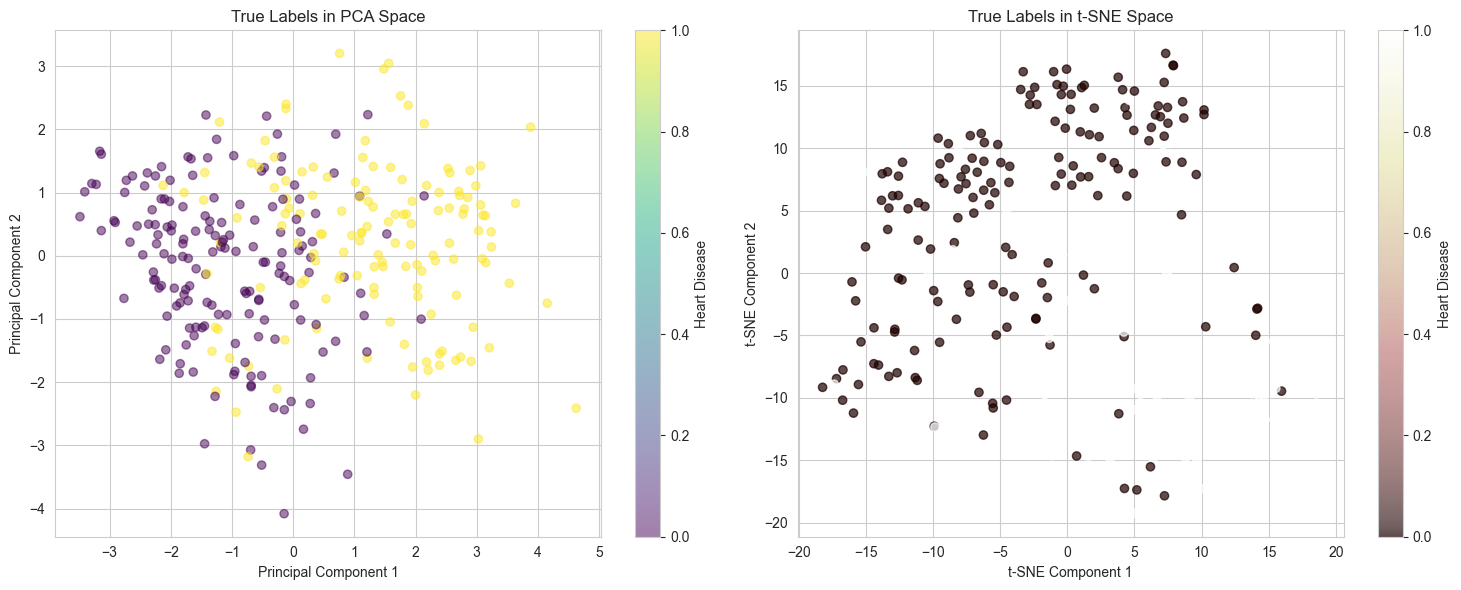


K-MEANS CLUSTERING


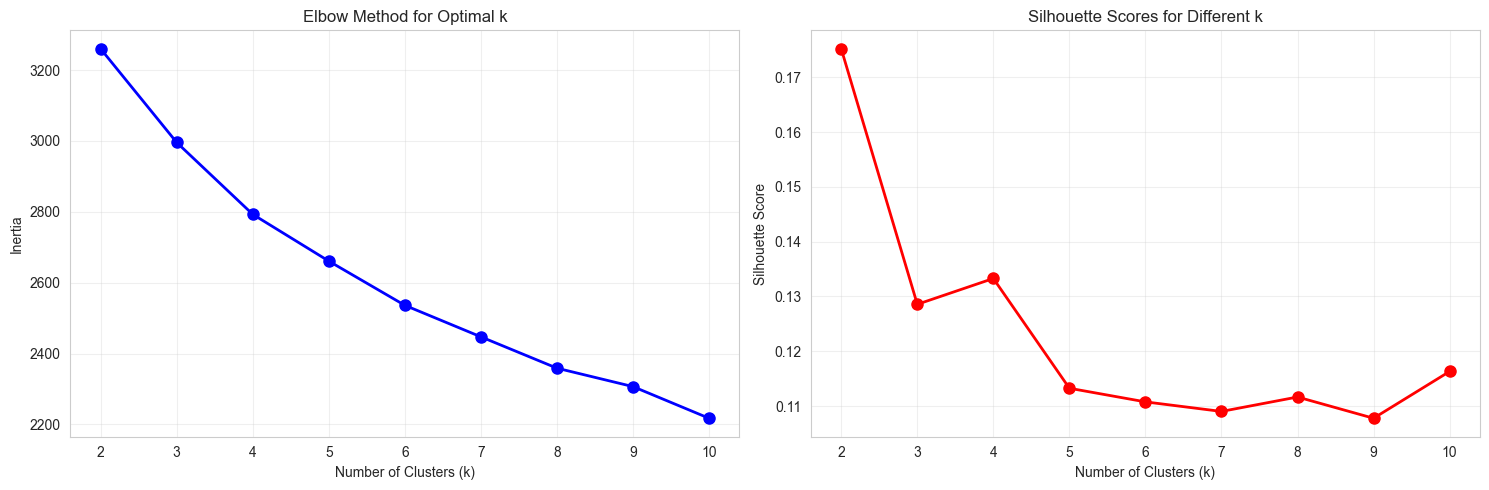

Optimal number of clusters: 2
K-Means clustering completed with 2 clusters

HIERARCHICAL CLUSTERING


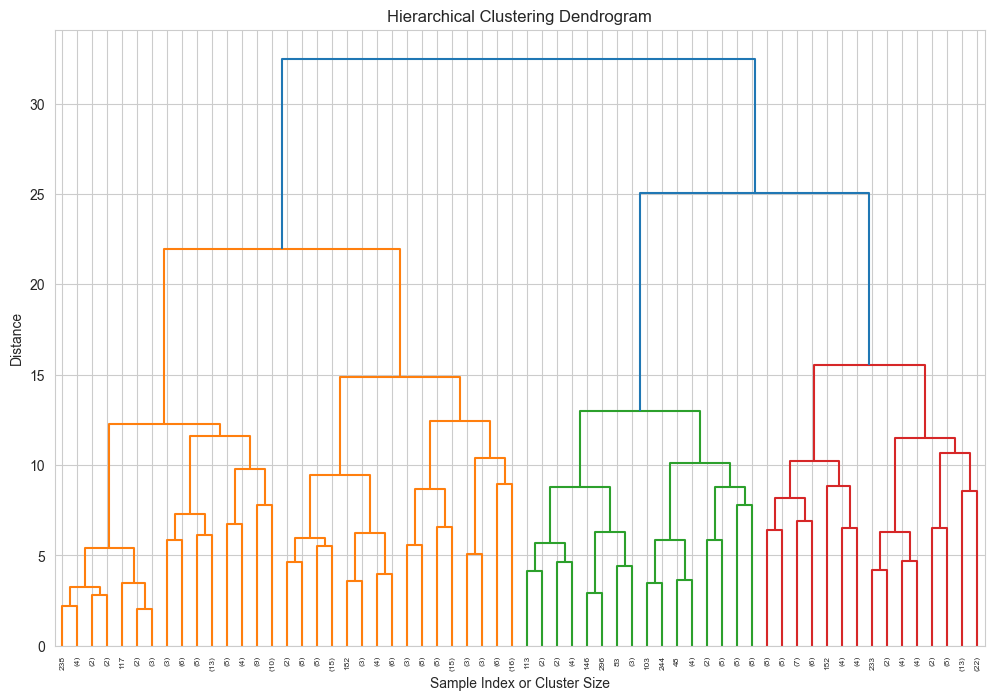

Hierarchical clustering completed with 3 clusters

DBSCAN CLUSTERING
DBSCAN found 0 clusters with 303 noise points
Trying alternative DBSCAN parameters...
DBSCAN found 1 clusters with 300 noise points

CLUSTERING EVALUATION
Clustering Evaluation Metrics:


,Method,Silhouette,Calinski-Harabasz,Adjusted_Rand_Index,Homogeneity,Completeness,V_Measure,n_Clusters
0,K-Means,0.1752,62.6844,0.4469,0.3597,0.3738,0.3666,2
1,Hierarchical,0.1624,40.7073,NaN,NaN,NaN,NaN,3



CLUSTERING VISUALIZATION


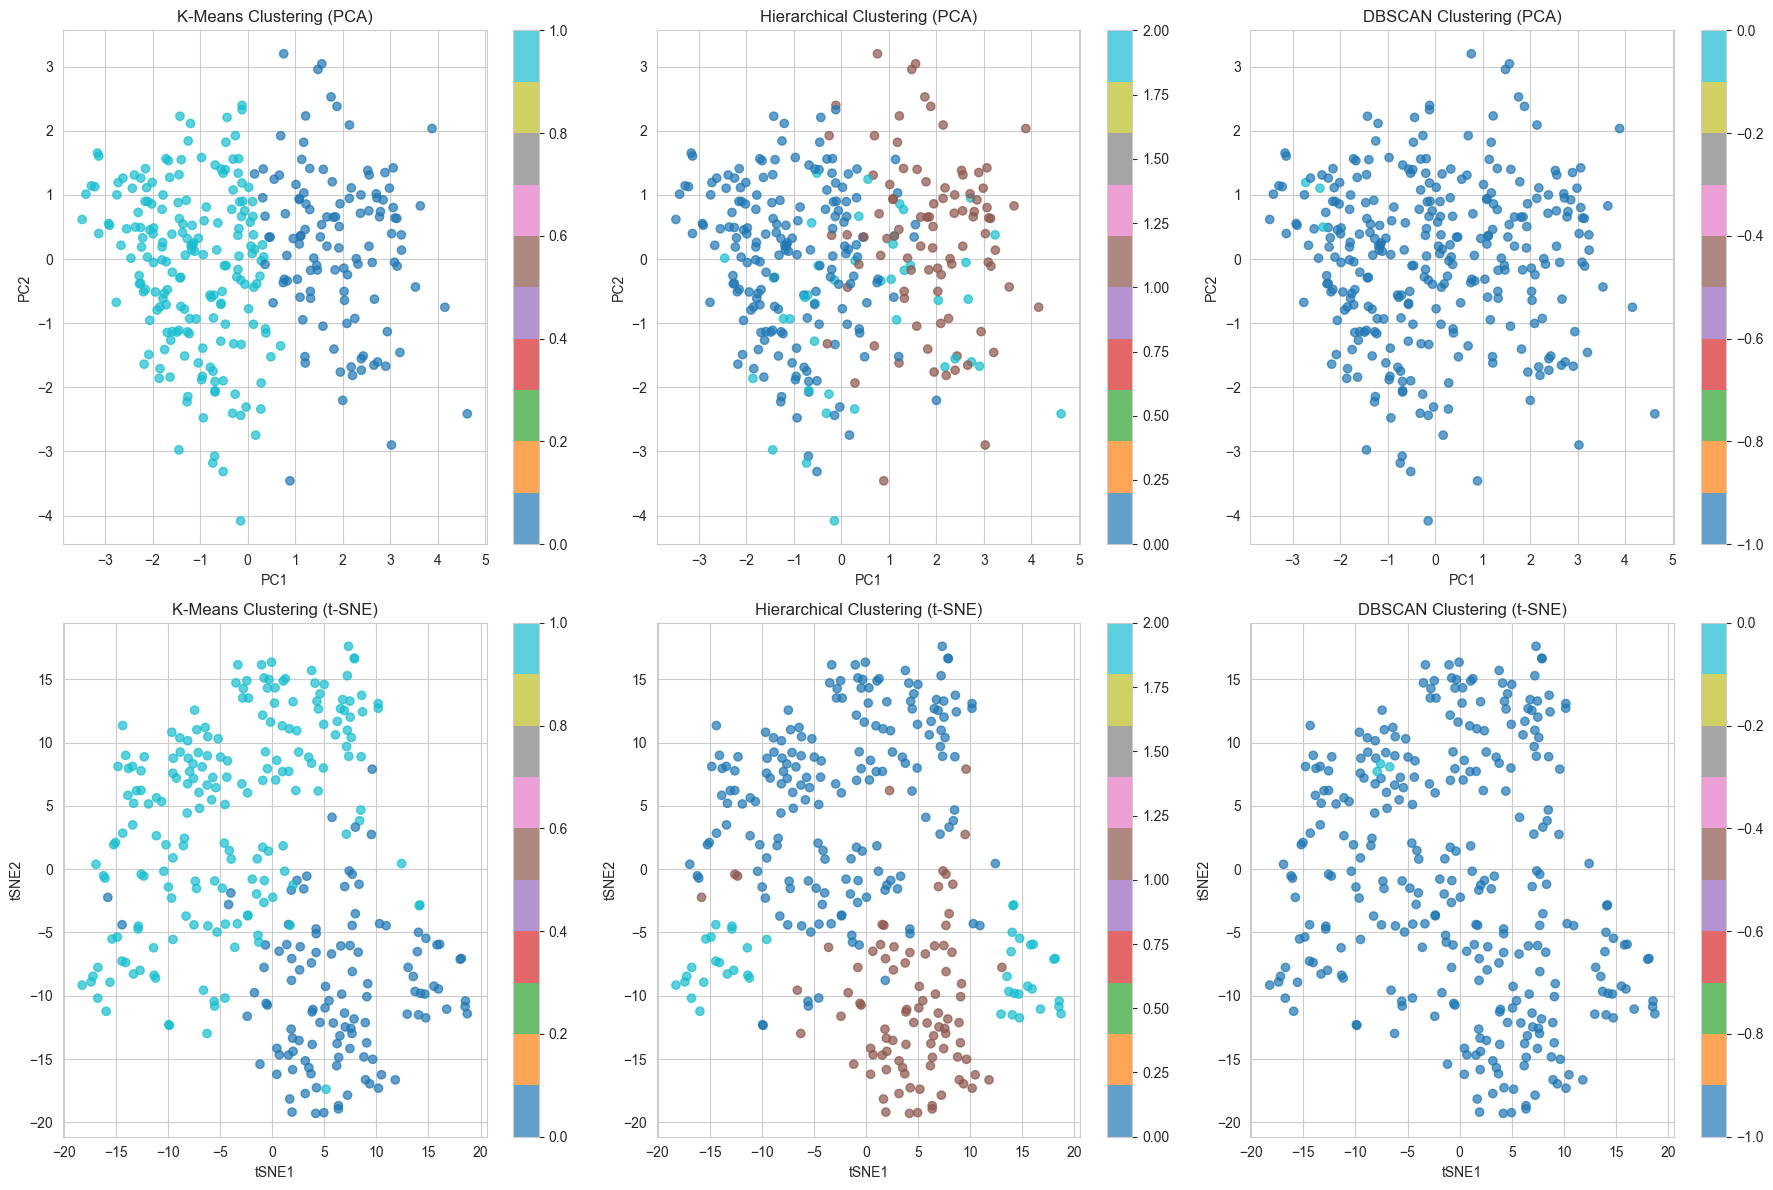


CLUSTER-TRUTH COMPARISON
Cluster-Truth comparison for K-Means:


True Label,0,1
Cluster,,
0,13,102
1,151,37



CLUSTER CHARACTERISTICS ANALYSIS
Cluster characteristics (mean values):


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,target_original
cluster,,,,,,,,,,,,,,,
0,0.414,0.295,0.642,0.183,0.146,0.145,0.220,-0.721,0.749,0.714,0.593,0.621,0.736,0.887,2.017
1,-0.253,-0.180,-0.393,-0.112,-0.089,-0.089,-0.135,0.441,-0.458,-0.437,-0.362,-0.380,-0.450,0.197,0.277


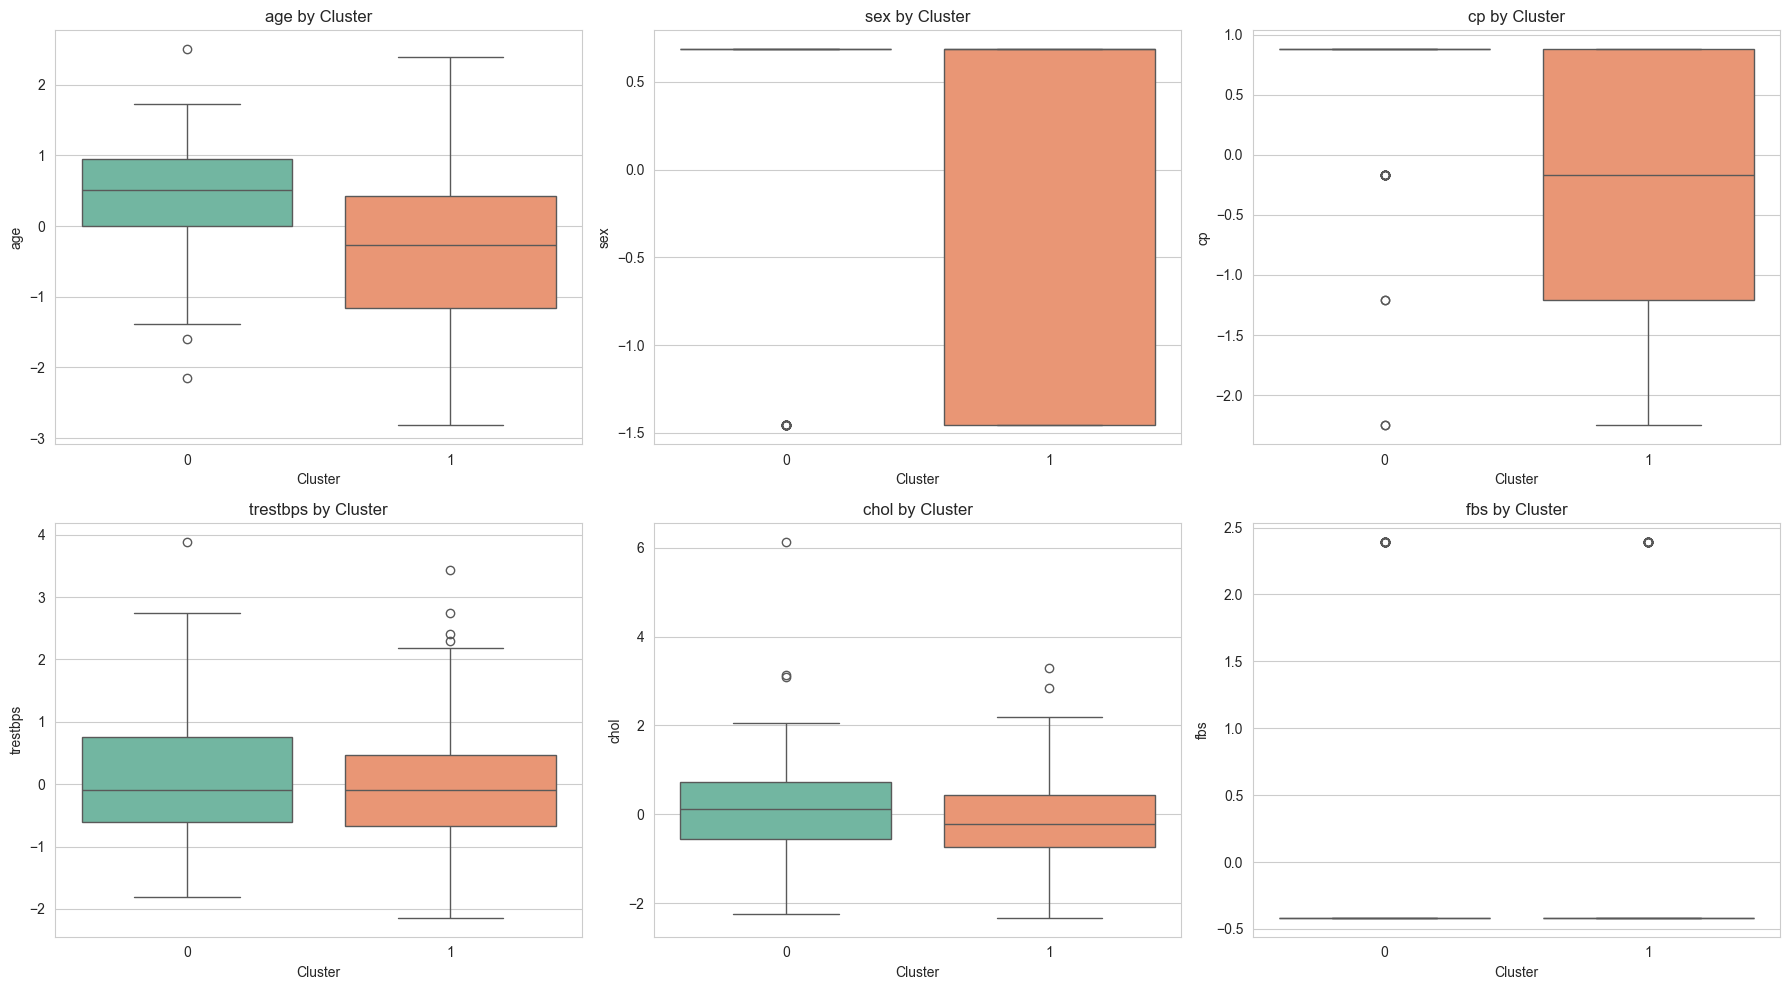

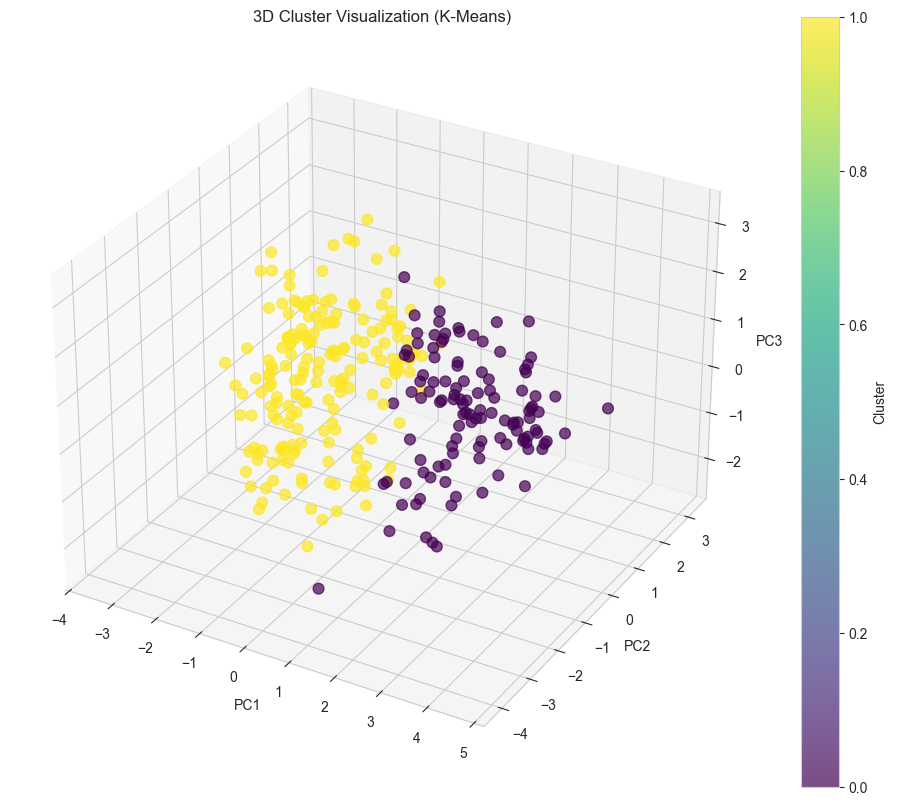


SAVING RESULTS
✓ Clustered data saved to '../data/heart_disease_clustered.csv'
✓ K-Means model saved
✓ Clustering scaler saved
✓ Clustering evaluation saved to '../results/clustering_evaluation.csv'
✓ Cluster characteristics saved to '../results/cluster_characteristics.csv'

FINAL SUMMARY
Best clustering method: K-Means
Number of clusters: 2
Silhouette score: 0.1752
Adjusted Rand Index: 0.4469

Cluster sizes:
Cluster 0: 115 patients (38.0%)
Cluster 1: 188 patients (62.0%)

✓ Unsupervised learning analysis completed successfully!


In [8]:
# Heart Disease UCI - Unsupervised Learning Clustering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import (silhouette_score, calinski_harabasz_score, adjusted_rand_score, homogeneity_score, completeness_score, v_measure_score)
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load thedata
print("Loading datasets...")
df = pd.read_csv('../data/heart_disease_processed.csv')

print("Dataset shape:", df.shape)
print("\nDataset columns:", df.columns.tolist())
print("\nFirst 5 rows:")
display(df.head())

# Prepare data for clustering (without target labels)
X = df.drop(['target', 'target_original'], axis=1)
true_labels = df['target']  # For evaluation only

print(f"\nFeature matrix shape: {X.shape}")
print(f"True labels distribution:\n{true_labels.value_counts()}")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("\n✓ Features scaled successfully")

# Dimensionality reduction for visualization
print("\n" + "="*60)
print("DIMENSIONALITY REDUCTION FOR VISUALIZATION")
print("="*60)

# Apply PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
X_pca_df['true_label'] = true_labels.values

print(f"PCA explained variance: {pca.explained_variance_ratio_.sum():.3f}")

# Apply t-SNE for non-linear visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)
X_tsne_df = pd.DataFrame(X_tsne, columns=['tSNE1', 'tSNE2'])
X_tsne_df['true_label'] = true_labels.values

# Visualize true labels in reduced space
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# PCA visualization
scatter1 = ax1.scatter(X_pca_df['PC1'], X_pca_df['PC2'], c=X_pca_df['true_label'], 
                      cmap='viridis', alpha=0.5)
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.set_title('True Labels in PCA Space')
plt.colorbar(scatter1, ax=ax1, label='Heart Disease')

# t-SNE visualization (true labels)
scatter2 = ax2.scatter(
    X_tsne_df['tSNE1'], X_tsne_df['tSNE2'], c=X_tsne_df['true_label'],
    cmap='pink', alpha=0.7  # changed from 'viridis'
)
ax2.set_xlabel('t-SNE Component 1')
ax2.set_ylabel('t-SNE Component 2')
ax2.set_title('True Labels in t-SNE Space')
plt.colorbar(scatter2, ax=ax2, label='Heart Disease')


plt.tight_layout()
plt.show()

# Method 1: K-Means Clustering
print("\n" + "="*60)
print("K-MEANS CLUSTERING")
print("="*60)

# Determine optimal number of clusters using Elbow Method
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, cluster_labels))

# Plot Elbow Method and Silhouette Scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Elbow curve
ax1.plot(k_range, inertia, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method for Optimal k')
ax1.grid(True, alpha=0.3)

# Silhouette scores
ax2.plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Scores for Different k')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_k}")

# Apply K-Means with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

print(f"K-Means clustering completed with {optimal_k} clusters")

# Method 2: Hierarchical Clustering
print("\n" + "="*60)
print("HIERARCHICAL CLUSTERING")
print("="*60)

linkage_matrix = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.show()

# Choose number of clusters based on dendrogram
n_clusters_hierarchical = 3
hierarchical = AgglomerativeClustering(n_clusters=n_clusters_hierarchical, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(X_scaled)

print(f"Hierarchical clustering completed with {n_clusters_hierarchical} clusters")

# Method 3: DBSCAN Clustering
print("\n" + "="*60)
print("DBSCAN CLUSTERING")
print("="*60)

# Try different DBSCAN parameters
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Count clusters (excluding noise points labeled as -1)
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"DBSCAN found {n_clusters_dbscan} clusters with {n_noise} noise points")

# If DBSCAN didn't find good clusters, try different parameters
if n_clusters_dbscan < 2:
    print("Trying alternative DBSCAN parameters...")
    dbscan = DBSCAN(eps=1.0, min_samples=3)
    dbscan_labels = dbscan.fit_predict(X_scaled)
    n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    n_noise = list(dbscan_labels).count(-1)
    print(f"DBSCAN found {n_clusters_dbscan} clusters with {n_noise} noise points")

# Evaluate clustering results
print("\n" + "="*60)
print("CLUSTERING EVALUATION")
print("="*60)

clustering_results = {
    'K-Means': kmeans_labels,
    'Hierarchical': hierarchical_labels,
    'DBSCAN': dbscan_labels
}

evaluation_metrics = []

for name, labels in clustering_results.items():
    # Skip evaluation if only one cluster or mostly noise
    if len(set(labels)) <= 1 or (name == 'DBSCAN' and n_clusters_dbscan < 2):
        continue
    
    # Internal metrics (no true labels needed)
    silhouette = silhouette_score(X_scaled, labels)
    calinski = calinski_harabasz_score(X_scaled, labels)
    
    # External metrics (compare with true labels)
    if len(set(labels)) == len(set(true_labels)):
        ari = adjusted_rand_score(true_labels, labels)
        homogeneity = homogeneity_score(true_labels, labels)
        completeness = completeness_score(true_labels, labels)
        v_measure = v_measure_score(true_labels, labels)
    else:
        ari = homogeneity = completeness = v_measure = np.nan
    
    evaluation_metrics.append({
        'Method': name,
        'Silhouette': silhouette,
        'Calinski-Harabasz': calinski,
        'Adjusted_Rand_Index': ari,
        'Homogeneity': homogeneity,
        'Completeness': completeness,
        'V_Measure': v_measure,
        'n_Clusters': len(set(labels))
    })

evaluation_df = pd.DataFrame(evaluation_metrics)
evaluation_df = evaluation_df.round(4)

print("Clustering Evaluation Metrics:")
display(evaluation_df)

# Visualize clustering results
print("\n" + "="*60)
print("CLUSTERING VISUALIZATION")
print("="*60)

# Create subplots for each clustering method
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Row 1: PCA visualization
methods = list(clustering_results.keys())
for i, method in enumerate(methods):
    if i >= 3:  # Only first 3 methods
        break
        
    labels = clustering_results[method]
    scatter = axes[0, i].scatter(X_pca_df['PC1'], X_pca_df['PC2'], c=labels, 
                               cmap='tab10', alpha=0.7)
    axes[0, i].set_title(f'{method} Clustering (PCA)')
    axes[0, i].set_xlabel('PC1')
    axes[0, i].set_ylabel('PC2')
    plt.colorbar(scatter, ax=axes[0, i])

# Row 2: t-SNE visualization
for i, method in enumerate(methods):
    if i >= 3:  # Only first 3 methods
        break
        
    labels = clustering_results[method]
    scatter = axes[1, i].scatter(X_tsne_df['tSNE1'], X_tsne_df['tSNE2'], c=labels, 
                               cmap='tab10', alpha=0.7)
    axes[1, i].set_title(f'{method} Clustering (t-SNE)')
    axes[1, i].set_xlabel('tSNE1')
    axes[1, i].set_ylabel('tSNE2')
    plt.colorbar(scatter, ax=axes[1, i])

# Remove empty subplots if needed
for i in range(len(methods), 3):
    for j in range(2):
        fig.delaxes(axes[j, i])

plt.tight_layout()
plt.show()

# Compare clusters with true labels
print("\n" + "="*60)
print("CLUSTER-TRUTH COMPARISON")
print("="*60)

# For the best clustering method (highest silhouette score)
best_method = evaluation_df.loc[evaluation_df['Silhouette'].idxmax(), 'Method']
best_labels = clustering_results[best_method]

# Create cross-tabulation
cluster_truth_comparison = pd.crosstab(
    pd.Series(best_labels, name='Cluster'),
    pd.Series(true_labels, name='True Label')
)

print(f"Cluster-Truth comparison for {best_method}:")
display(cluster_truth_comparison)

# Analyze cluster characteristics
print("\n" + "="*60)
print("CLUSTER CHARACTERISTICS ANALYSIS")
print("="*60)

# Add cluster labels to original data
df_clustered = df.copy()
df_clustered['cluster'] = best_labels

# Analyze mean values for each cluster
cluster_characteristics = df_clustered.groupby('cluster').mean()
print("Cluster characteristics (mean values):")
display(cluster_characteristics.round(3))

# Visualize cluster characteristics
numeric_cols = df_clustered.select_dtypes(include=[np.number]).columns
numeric_cols = [col for col in numeric_cols if col not in ['target', 'target_original', 'cluster']]

# Select top features for visualization
top_features = numeric_cols[:6]  # First 6 features

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, feature in enumerate(top_features):
    if i >= len(axes):
        break
        
    # Boxplot of feature by cluster
    sns.boxplot(data=df_clustered, x='cluster', y=feature, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{feature} by Cluster')
    axes[i].set_xlabel('Cluster')

# Remove empty subplots
for i in range(len(top_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# 3D visualization if possible
try:
    from mpl_toolkits.mplot3d import Axes3D
    

    pca_3d = PCA(n_components=3)
    X_pca_3d = pca_3d.fit_transform(X_scaled)
    
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], 
                        c=best_labels, cmap='viridis', alpha=0.7, s=60)
    
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title(f'3D Cluster Visualization ({best_method})')
    plt.colorbar(scatter, ax=ax, label='Cluster')
    
    plt.show()
except ImportError:
    print("3D visualization not available")

# Save results
print("\n" + "="*60)
print("SAVING RESULTS")
print("="*60)

# Save clustered data
df_clustered.to_csv('../data/heart_disease_clustered.csv', index=False)
print("✓ Clustered data saved to '../data/heart_disease_clustered.csv'")

# Save clustering models
import joblib

joblib.dump(kmeans, '../models/kmeans_model.pkl')
print("✓ K-Means model saved")

joblib.dump(scaler, '../models/clustering_scaler.pkl')
print("✓ Clustering scaler saved")

# Save evaluation results
evaluation_df.to_csv('../results/clustering_evaluation.csv', index=False)
print("✓ Clustering evaluation saved to '../results/clustering_evaluation.csv'")

# Save cluster characteristics
cluster_characteristics.to_csv('../results/cluster_characteristics.csv')
print("✓ Cluster characteristics saved to '../results/cluster_characteristics.csv'")

# summary
print("\n" + "="*60)
print("FINAL SUMMARY")
print("="*60)

print(f"Best clustering method: {best_method}")
print(f"Number of clusters: {len(set(best_labels))}")
print(f"Silhouette score: {evaluation_df.loc[evaluation_df['Method'] == best_method, 'Silhouette'].iloc[0]:.4f}")

if best_method != 'DBSCAN' or n_clusters_dbscan >= 2:
    ari = evaluation_df.loc[evaluation_df['Method'] == best_method, 'Adjusted_Rand_Index'].iloc[0]
    if not np.isnan(ari):
        print(f"Adjusted Rand Index: {ari:.4f}")

print("\nCluster sizes:")
cluster_sizes = df_clustered['cluster'].value_counts().sort_index()
for cluster, size in cluster_sizes.items():
    print(f"Cluster {cluster}: {size} patients ({size/len(df_clustered)*100:.1f}%)")

print("\n✓ Unsupervised learning analysis completed successfully!")